In [11]:
import matplotlib.pyplot as plt
import numpy as np
from Q_Learning_ck import evaluate, train, make_QTables
from extended_pd import parallel_env

In [12]:
env = parallel_env()

# Values of gamma to test
gamma_values = [0.8, 0.9, 0.95, 0.99]

# Lists to store results for each gamma
mean_rewards_list = []

In [13]:
trials = 1

tot_rew = []

for t in range(trials):

    tot_rew_per_episode = []

    for gamma in gamma_values:
        alfa = 0.01
        adecay = 0.0001
        env = parallel_env()
        observations, infos = env.reset()
        qtables = make_QTables(env, gamma)
        qtables,tot_rew_per_gamma = train(env, 100000, 0, 0.2, 0.000006, 100, qtables, gamma, alfa, adecay)
        tot_rew_per_episode.append(tot_rew_per_gamma)
    
    tot_rew.append(tot_rew_per_episode)

In [14]:
print(tot_rew)

[[[0.3011111111111111, 0.3177777777777779, 0.2888888888888887, 0.29777777777777764, 0.3644444444444444, 0.31111111111111106, 0.34555555555555556, 0.34999999999999987, 0.34222222222222215, 0.3299999999999999, 0.30333333333333323, 0.31444444444444447, 0.3266666666666666, 0.2833333333333332, 0.3366666666666666, 0.33999999999999986, 0.3566666666666667, 0.33555555555555555, 0.3333333333333332, 0.3755555555555555, 0.3488888888888888, 0.3366666666666665, 0.35222222222222216, 0.3233333333333331, 0.312222222222222, 0.30999999999999983, 0.3111111111111109, 0.34222222222222204, 0.33333333333333326, 0.3244444444444445, 0.30444444444444424, 0.33888888888888874, 0.32333333333333336, 0.2922222222222221, 0.3466666666666665, 0.27999999999999986, 0.30444444444444424, 0.3066666666666666, 0.31333333333333324, 0.33555555555555544, 0.32666666666666655, 0.32222222222222213, 0.33111111111111097, 0.31444444444444414, 0.3655555555555554, 0.35888888888888876, 0.34555555555555556, 0.3499999999999999, 0.3544444444

In [15]:
my_array = np.array(tot_rew)

my_array.shape

(1, 4, 100000)

In [16]:
average_payoffs = np.mean(my_array, axis=0)

average_payoffs.shape

(4, 100000)

In [17]:
average_payoffs

array([[0.30111111, 0.31777778, 0.28888889, ..., 0.87555556, 0.87888889,
        0.87777778],
       [0.29555556, 0.34444444, 0.31555556, ..., 0.38777778, 0.38555556,
        0.38444444],
       [0.23222222, 0.28111111, 0.25888889, ..., 0.65444444, 0.65222222,
        0.65777778],
       [0.13666667, 0.10333333, 0.15444444, ..., 0.43666667, 0.44222222,
        0.44      ]])

In [18]:
average_payoffs = np.transpose(average_payoffs)

average_payoffs.shape

(100000, 4)

In [19]:
average_payoffs

array([[0.30111111, 0.29555556, 0.23222222, 0.13666667],
       [0.31777778, 0.34444444, 0.28111111, 0.10333333],
       [0.28888889, 0.31555556, 0.25888889, 0.15444444],
       ...,
       [0.87555556, 0.38777778, 0.65444444, 0.43666667],
       [0.87888889, 0.38555556, 0.65222222, 0.44222222],
       [0.87777778, 0.38444444, 0.65777778, 0.44      ]])

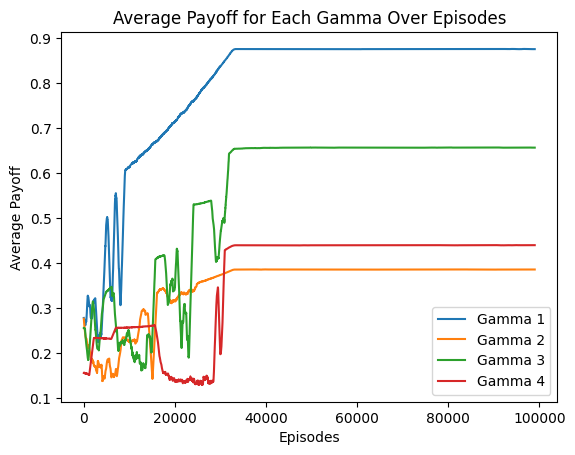

In [20]:
# Calculate the average payoff for each gamma
average_payoffs = np.mean(my_array, axis=0)

# Transpose the array for plotting
average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 1000

# Create a plot
fig, ax = plt.subplots()

# Plot each line for different gammas with smoothing
for i in range(average_payoffs.shape[1]):
    smoothed_values = np.convolve(average_payoffs[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=f'Gamma {i+1}')

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Gamma Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()